## US Viewers in Millions (Audiencia en EE.UU. en millones)
--Medidas de tendencia central: La media te dice la audiencia promedio por episodio en millones de espectadores. La mediana cercana a la media indica una distribución balanceada, mientras que una diferencia significativa sugiere episodios extremadamente populares.

--Medidas de dispersión: Un rango amplio y una alta desviación estándar indican variabilidad en la audiencia. Es posible que los episodios de temporadas más recientes tengan menos espectadores, lo que explicaría una distribución asimétrica.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"C:\Users\Martina\Documents\TUP\Estadistica y Probabilidad\TPI")

df = pd.read_csv('data\simpsons_episodes.csv')
print(df)

def calcular_medidas_tendencia_central(serie):
    media = serie.mean()     
    mediana = serie.median()  
    moda = serie.mode()     
    return media, mediana, moda

def calcular_medidas_dispersion(serie):
    rango = serie.max() - serie.min()  
    varianza = serie.var()           
    desviacion_estandar = serie.std() 
    return rango, varianza, desviacion_estandar

      id                                          image_url  imdb_rating  \
0     10  http://static-media.fxx.com/img/FX_Networks_-_...          7.4   
1     12  http://static-media.fxx.com/img/FX_Networks_-_...          8.3   
2     14  http://static-media.fxx.com/img/FX_Networks_-_...          8.2   
3     17  http://static-media.fxx.com/img/FX_Networks_-_...          8.1   
4     19  http://static-media.fxx.com/img/FX_Networks_-_...          8.0   
..   ...                                                ...          ...   
595  500  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   
596  502  http://static-media.fxx.com/img/FX_Networks_-_...          7.3   
597  511  http://static-media.fxx.com/img/FX_Networks_-_...          6.9   
598  542  http://static-media.fxx.com/img/FX_Networks_-_...          6.4   
599  548  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   

     imdb_votes  number_in_season  number_in_series original_air_date  \
0        1511.

In [ ]:
viewers = df['us_viewers_in_millions'].dropna()

num_classes = int(1 + 3.322 * np.log10(len(viewers)))

freq_abs, bins = np.histogram(viewers, bins=num_classes)
freq_rel = freq_abs / len(viewers) 
freq_cum = np.cumsum(freq_abs)      

freq_table_viewers = pd.DataFrame({
    'Clase': [f"{round(bins[i], 2)} - {round(bins[i+1], 2)}" for i in range(len(bins)-1)],
    'Frecuencia Absoluta': freq_abs,
    'Frecuencia Relativa': freq_rel,
    'Frecuencia Acumulada': freq_cum
})

print(freq_table_viewers)

           Clase  Frecuencia Absoluta  Frecuencia Relativa  \
0    2.32 - 5.45                   80             0.134680   
1    5.45 - 8.58                  143             0.240741   
2    8.58 - 11.7                  126             0.212121   
3   11.7 - 14.83                   81             0.136364   
4  14.83 - 17.96                   60             0.101010   
5  17.96 - 21.09                   40             0.067340   
6  21.09 - 24.22                   31             0.052189   
7  24.22 - 27.34                   21             0.035354   
8  27.34 - 30.47                    9             0.015152   
9   30.47 - 33.6                    3             0.005051   

   Frecuencia Acumulada  
0                    80  
1                   223  
2                   349  
3                   430  
4                   490  
5                   530  
6                   561  
7                   582  
8                   591  
9                   594  


In [ ]:
print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(viewers)
print(f"Medidas de tendencia central para viewers:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n") 

------------------------------------------
Medidas de tendencia central para viewers:
  Media: 11.842794612794613
  Mediana: 10.3
  Moda: [14.4]



In [4]:
print("------------------------------------------")
rango, varianza, desviacion_estandar = calcular_medidas_dispersion(viewers)
print(f"Medidas de dispersión para viewers:")
print(f"  Rango: {rango}")
print(f"  Varianza: {varianza}")
print(f"  Desviación Estándar: {desviacion_estandar}\n")

------------------------------------------
Medidas de dispersión para viewers:
  Rango: 31.28
  Varianza: 41.14218644341106
  Desviación Estándar: 6.4142175238614305



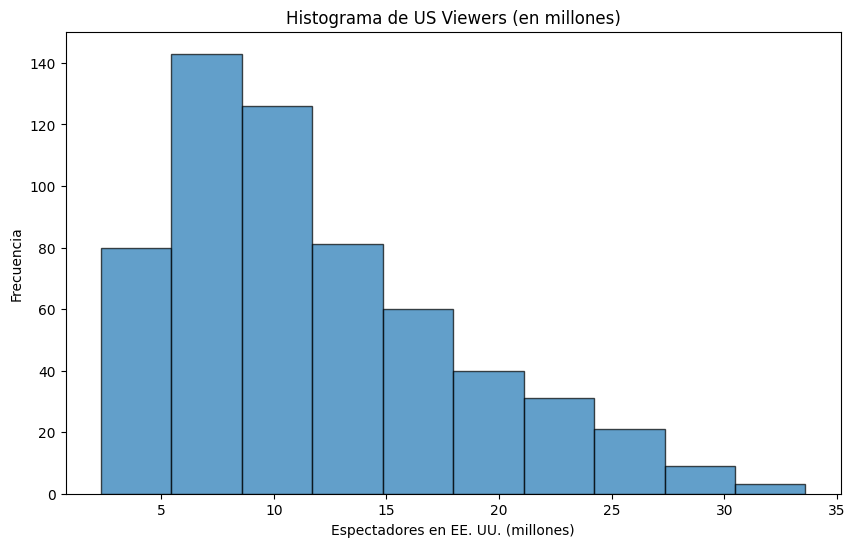

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(viewers, bins=num_classes, edgecolor='black', alpha=0.7)
plt.title("Histograma de US Viewers (en millones)")
plt.xlabel("Espectadores en EE. UU. (millones)")
plt.ylabel("Frecuencia")
plt.show()

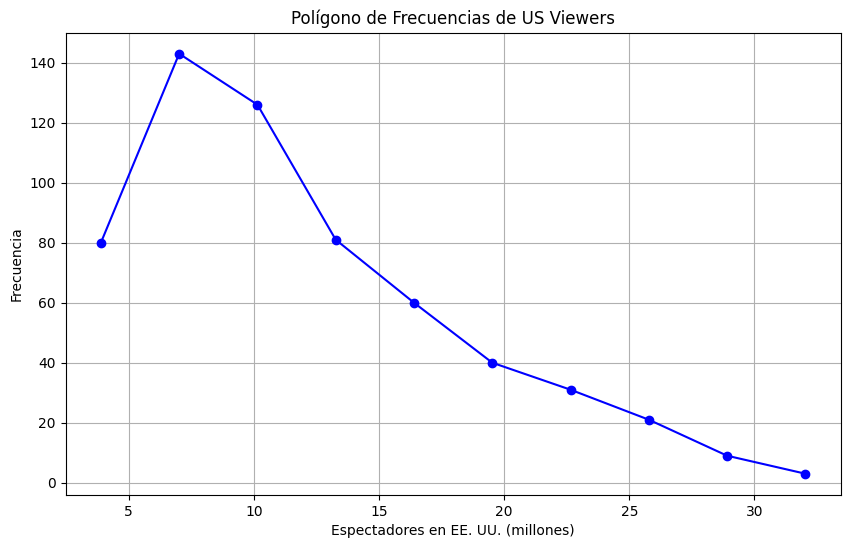

In [ ]:
freq_abs, bins = np.histogram(viewers, bins=num_classes)
class_midpoints = (bins[:-1] + bins[1:]) / 2  # Puntos medios de cada clase

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_abs, marker='o', linestyle='-', color='b')
plt.title("Polígono de Frecuencias de US Viewers")
plt.xlabel("Espectadores en EE. UU. (millones)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

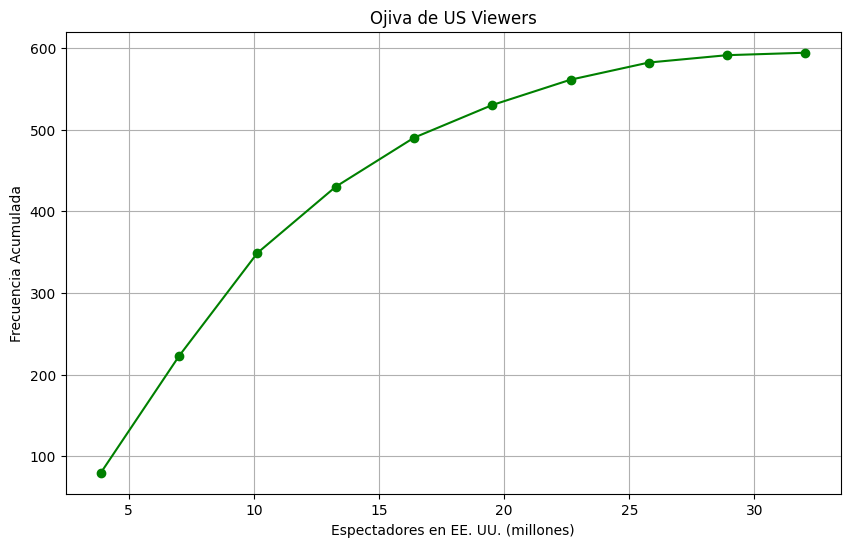

In [ ]:
freq_cum = np.cumsum(freq_abs)

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_cum, marker='o', linestyle='-', color='g')
plt.title("Ojiva de US Viewers")
plt.xlabel("Espectadores en EE. UU. (millones)")
plt.ylabel("Frecuencia Acumulada")
plt.grid(True)
plt.show()